# Model Evaluation and Testing

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip dataset
!unzip "/content/drive/MyDrive/Miniproject - Sem 6/HandGestures.zip" -d "/content/HandGestures/" &> /dev/null

In [ ]:
import os, shutil

test_path = '/content/HandGestures/test/test/'

# Remove extra directories from testing directory
for f in os.scandir(test_path):
    if len(f.path) == 34:
        print(f'Removing directory: "{f.name}"')
        shutil.rmtree(f.path)

Removing directory: "15"
Removing directory: "12"
Removing directory: "11"
Removing directory: "19"
Removing directory: "16"
Removing directory: "14"
Removing directory: "17"
Removing directory: "18"
Removing directory: "10"
Removing directory: "13"


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path, target_size=(50, 50), batch_size=32, class_mode='categorical')

Found 3000 images belonging to 10 classes.


In [ ]:
# Load model
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/Miniproject - Sem 6/gesture_classifier.h5')

In [ ]:
# Model evaluation
loss, accuracy = classifier.evaluate(test_generator)
print(f'Loss: {loss}\tAccuracy: {round(accuracy * 100, 3)}')

94/94 [==============================] - 7s 64ms/step - loss: 0.3374 - accuracy: 0.9057
Loss: 0.3373825252056122	Accuracy: 90.567




>> Class: 2
>> Prediction: 


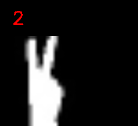



>> Class: 1
>> Prediction: 


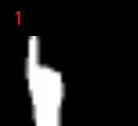



>> Class: 3
>> Prediction: 


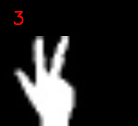



>> Class: 8
>> Prediction: 


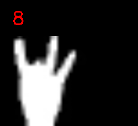



>> Class: 4
>> Prediction: 


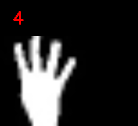



>> Class: 4
>> Prediction: 


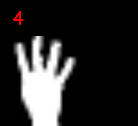



>> Class: 0
>> Prediction: 


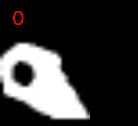



>> Class: 1
>> Prediction: 


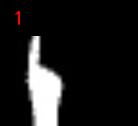



>> Class: 9
>> Prediction: 


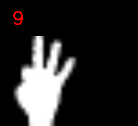



>> Class: 6
>> Prediction: 


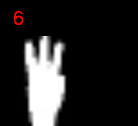

In [ ]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow


pred_classes = { f"[{i}]": str(i) for i in range(10) }                
dir_names = { str(i): str(i) for i in range(10) }

y_true, y_pred = [], []

# Get random image from random folder
def getRandomImage(path):
    folders = listdir(path)
    rand_dir = np.random.randint(0, len(folders))
    path_class = folders[rand_dir]
    y_true.append(dir_names[str(path_class)])
    print("\n\n>> Class: " + dir_names[str(path_class)])
    file_path = path + '/' + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    rand_file_idx = np.random.randint(0, len(file_names))
    image_name = file_names[rand_file_idx]
    return cv2.imread(file_path + "/" +image_name)    

# Put text and draw border on image
def textAndBorder(pred, img):
    img = cv2.resize(img, (150, 150), interpolation=cv2.INTER_LINEAR)
    disease = pred_classes[str(pred)]
    expanded_image = cv2.copyMakeBorder(img, 60, 0, 0, 80, cv2.BORDER_CONSTANT, value=(0,0,0))
    cv2.putText(expanded_image, disease, (20,40) , cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    expanded_image = cv2.resize(expanded_image, None, fx = 0.6, fy = 0.6)
    cv2_imshow(expanded_image)

# Randomly select 10 images from testing directory and make prediction
for i in range(10):
    input_im = getRandomImage(test_path)
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    
    input_img = cv2.resize(input_im, (50, 50), interpolation=cv2.INTER_LINEAR)
    input_img = input_img / 255.
    input_img = input_img.reshape(1,50,50,3) 
    
    pred = classifier.predict(input_img, 1, verbose = 0)
    res = np.argmax(pred, axis=1)
    y_pred.append(pred_classes[str(res)])

    print(">> Prediction: ")
    textAndBorder(res, input_original)